## ไฟล์นี้เป็นตัวอย่างการเรียกใช้งาน CNN โดยใช้ข้อมูลของ Fashion MNIST

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.10.1
2.10.0


### จัดการข้อมูล
<br> ต้องมีการปรับ หรือ reshape ข้อมูลนิดหน่อยเพื่อให้สอดคล้องกับตัว CNN ที่เป็น 2 มิติ 
<br> โดยแต่ละมิติเป็นดังนี้ (จำนวนภาพ, ค.กว้าง, ค.ยาว, มิติสี) ในที่นี้ภาพเป็นขาวดำจึงมีทั้งหมด 1 มิติสีเท่านั้น

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

### สร้างโมเดล
input_shae = (28, 28, 1) เพื่อบอกว่าภาพมีขนาด 28 x 28 และ 1 มิติสีเท่านั้น ถ้าภาพเป็น RGB จะเป็น (28, 28, 3)

<br> padding = 'same' คืออะไร?
<br>เนื่องจากว่า Filter นั้นมีขนาด 3x3 ซึ่งก็จะหลีกเลี่ยงไม่ได้เลยว่าตรงขอบจะไม่ได้ถูกพิจารณา
<br>การสั่ง padding เป็นการเติมขอบของรูปภาพออกไปเพื่อให้ filter นั้นพิจารณาตรงขอบด้วย
<br>'same' หมายความว่าให้เติมส่วนขอบด้วยเลข 0 (zero padding)

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same', 
                        input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_images, train_labels, batch_size=256, 
                    validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
235/235 [==============================] - 8s 7ms/step - loss: 0.5127 - accuracy: 0.8268 - val_loss: 0.4059 - val_accuracy: 0.8615
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3408 - accuracy: 0.8809 - val_loss: 0.3484 - val_accuracy: 0.8776
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2962 - accuracy: 0.8962 - val_loss: 0.3237 - val_accuracy: 0.8842
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2690 - accuracy: 0.9046 - val_loss: 0.3104 - val_accuracy: 0.8903
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2495 - accuracy: 0.9121 - val_loss: 0.3058 - val_accuracy: 0.8924
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2354 - accuracy: 0.9174 - val_loss: 0.2962 - val_accuracy: 0.8936
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2221 - accuracy: 0.9214 - val_loss: 0.2938 - val_accuracy: 0.8955
Epoch 

### วิเคราะห์
จะสังเกตุได้ว่าพอเราหันมาใช้ CNN ที่มองภาพเป็นส่วนๆแล้ว acc นั้นดีขึ้นอย่างเห็นได้ชัด ที่สำคัญไปกว่านั้น loss ก็ต่ำมากๆเช่นกัน <br>
แสดงว่าวิธีของ CNN เหมือนจะดีกว่า แต่จะสังเกตุได้ว่ามันยังดูจะไม่เก่งเมื่อเจอข้อมูลที่ไม่เคยเห็น

In [7]:
print(history.history.keys())
# print(history.history['loss'])
# key = 'val_loss'
# for i,value in enumerate(history.history[key]):
#     print(f"epoch {i}: {value}")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


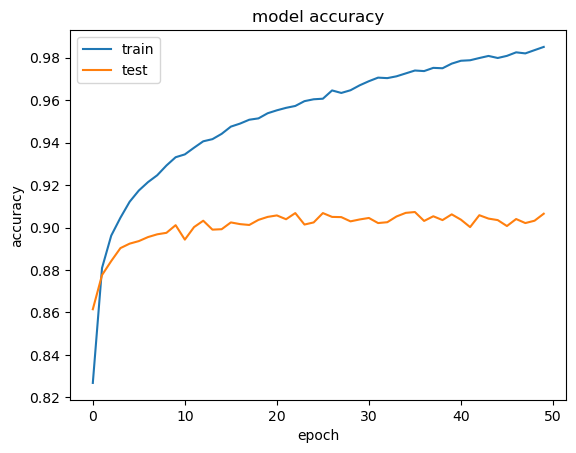

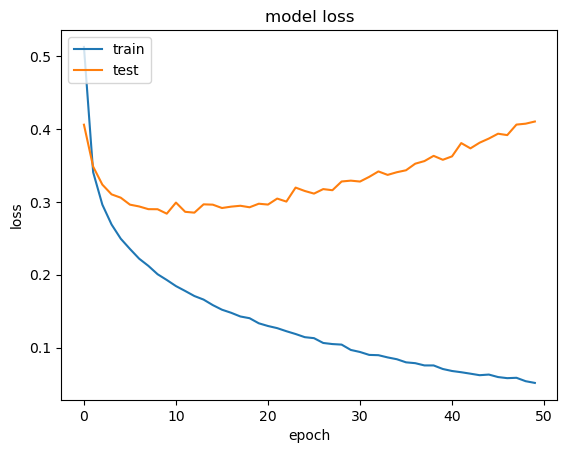

In [8]:
# plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### วิเคราะห์ผลลัพธ์

### Accuracy <br> 
จะเห็นได้ว่าความแม่นยำในระหว่างฝึกนั้นเพิ่มสูงขึ้นเรื่อยๆ จนได้ความแม่นยำที่ 98+% <br>
แต่เมื่อดูที่ผลของ test จะเห็นว่าความเม่นยำอยู่ที่ ***90%*** <br>

### Loss
ค่าความห่างจากเฉลยหรือ loss นั้นลดลงเมื่อจำนวนรอบเพิ่มขึ้น <br>
แต่ดูเหมือนว่า ผล loss ที่ผ่านข้อมูล validation เข้ามานั้นมีแนวโน้มที่เพิ่มขึ้นอย่างเห็นได้ชัด ***ซึ่งถือว่าไม่ดี***

## แล้วถ้าเพิ่ม Layer จะเกิดอะไรขึ้น ไปดูไฟล์ Convolution + Dense 64.ipynb